In [ ]:
!unzip /content/hard.zip
!unzip /content/easy.zip
!unzip /content/medium.zip

Archive:  /content/hard.zip
   creating: hard/
  inflating: hard/Screenshot (100).png  
  inflating: hard/Screenshot (120).png  
  inflating: hard/Screenshot (121).png  
  inflating: hard/Screenshot (122).png  
  inflating: hard/Screenshot (123).png  
  inflating: hard/Screenshot (124).png  
  inflating: hard/Screenshot (125).png  
  inflating: hard/Screenshot (126).png  
  inflating: hard/Screenshot (127).png  
  inflating: hard/Screenshot (128).png  
  inflating: hard/Screenshot (129).png  
  inflating: hard/Screenshot (130).png  
  inflating: hard/Screenshot (131).png  
  inflating: hard/Screenshot (132).png  
  inflating: hard/Screenshot (133).png  
  inflating: hard/Screenshot (82).png  
  inflating: hard/Screenshot (83).png  
  inflating: hard/Screenshot (84).png  
  inflating: hard/Screenshot (86).png  
  inflating: hard/Screenshot (87).png  
  inflating: hard/Screenshot (88).png  
  inflating: hard/Screenshot (89).png  
  inflating: hard/Screenshot (96).png  
  inflating: hard/

In [ ]:
!pip install torch torchvision
!pip install yolov5
!pip install ipywidgets

# Import libraries
import torch
from matplotlib import pyplot as plt
import os
import random
from IPython.display import display, Image
import ipywidgets as widgets

from PIL import Image as PILImage
import matplotlib.pyplot as plt



In [ ]:
# Load YOLOv5 pre-trained model (small version for speed)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
import random
import os
import ipywidgets as widgets
from IPython.display import display
from PIL import Image as PILImage
import matplotlib.pyplot as plt

Button(description='Easy', style=ButtonStyle())

Button(description='Medium', style=ButtonStyle())

Button(description='Hard', style=ButtonStyle())

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


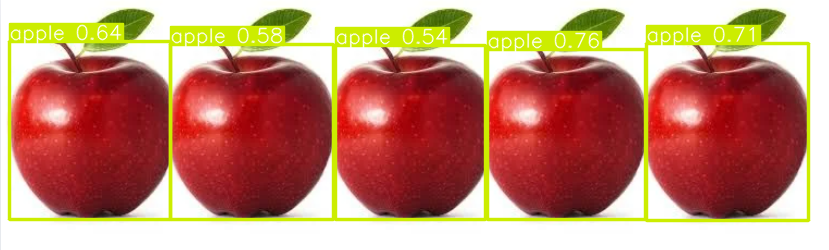

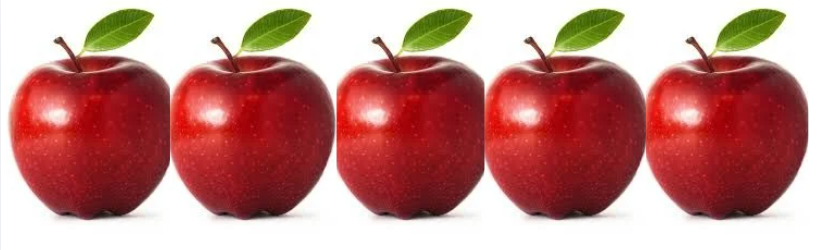

Button(description='14', style=ButtonStyle())

Button(description='2', style=ButtonStyle())

Button(description='5', style=ButtonStyle())

Button(description='20', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


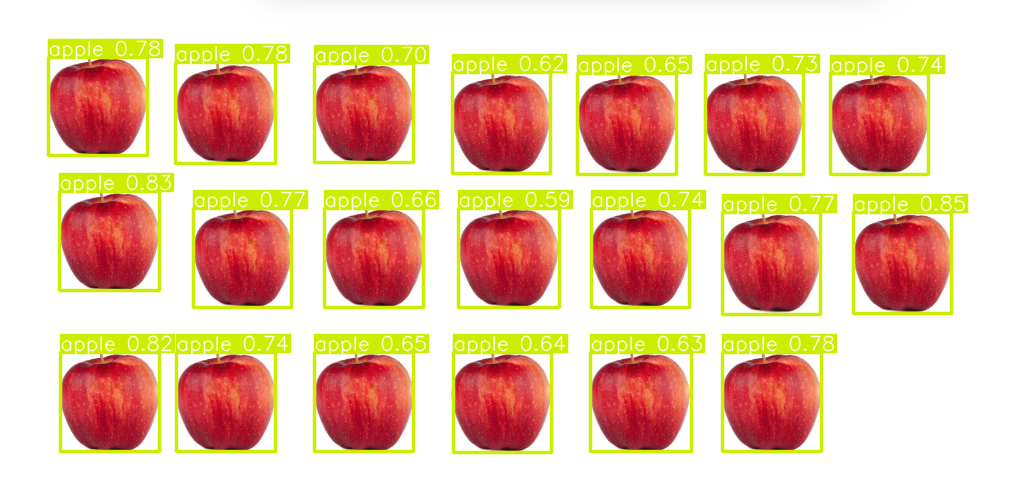

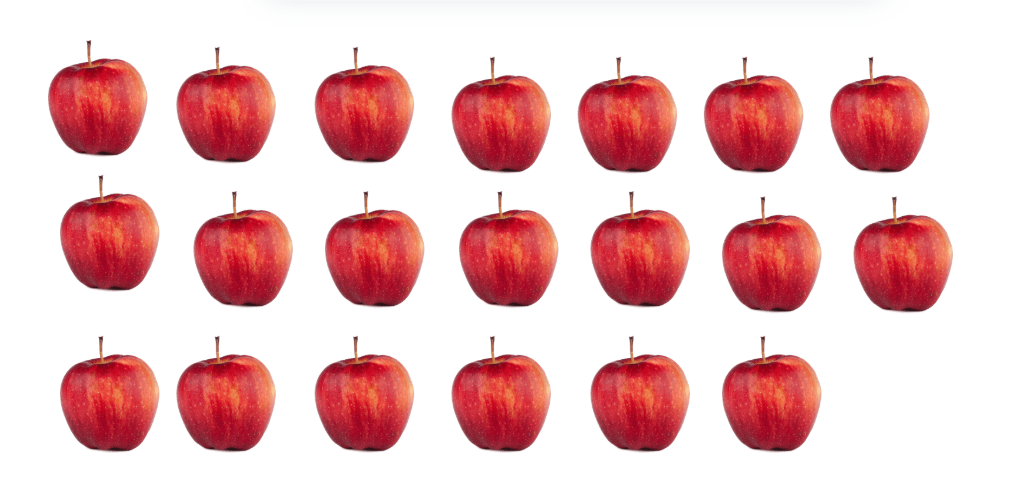

Button(description='2', style=ButtonStyle())

Button(description='19', style=ButtonStyle())

Button(description='20', style=ButtonStyle())

Button(description='5', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

Correct! There are 20 apples in the image.


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


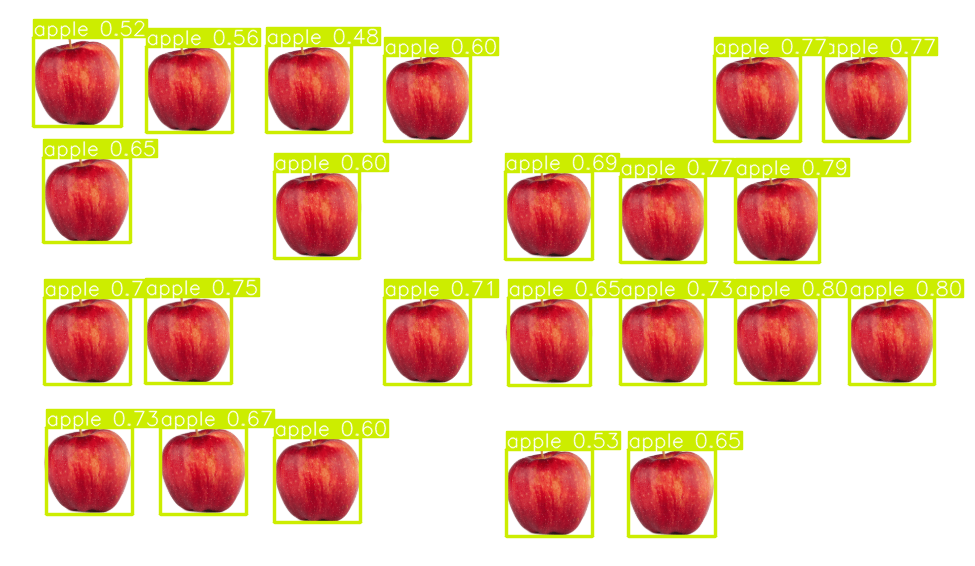

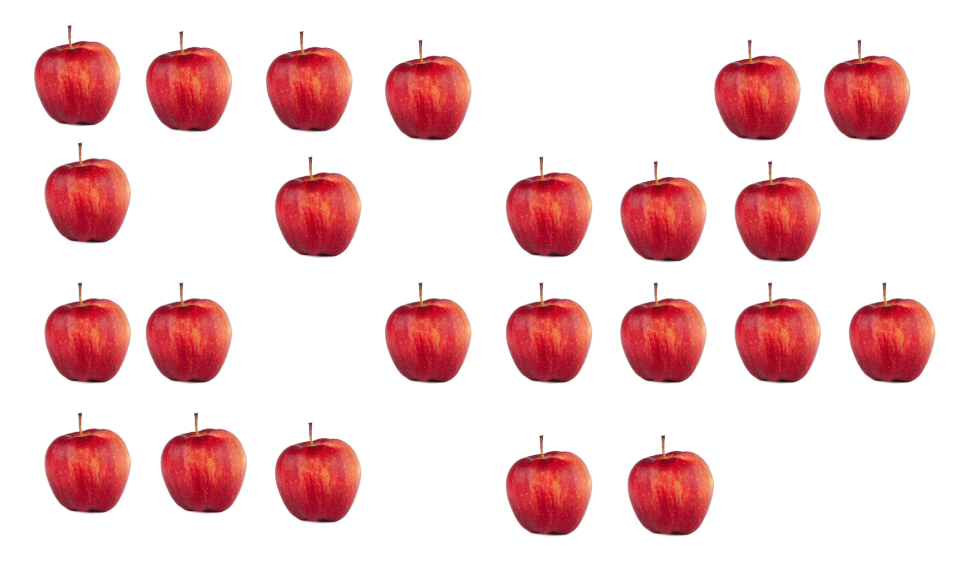

Button(description='6', style=ButtonStyle())

Button(description='5', style=ButtonStyle())

Button(description='23', style=ButtonStyle())

Button(description='0', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

In [ ]:


# Define the difficulty levels
datasets = {
    'easy': '/content/easy',
    'medium': '/content/medium',
    'hard': '/content/hard'
}

fruit_classes_dict = {
    'easy': ['apple'],
    'medium': ['apple'],
    'hard': ['apple']
}

current_difficulty = 'easy'

# Global variables for game state
image_folder = datasets[current_difficulty]
fruit_classes = fruit_classes_dict[current_difficulty]
img_path = ""
fruit_count = 0

# Function to load a new dataset based on the difficulty
def load_new_dataset(difficulty):
    global current_difficulty, image_folder, fruit_classes
    current_difficulty = difficulty
    image_folder = datasets[difficulty]
    fruit_classes = fruit_classes_dict[difficulty]

# Function to select a random image and perform inference
def select_random_image_and_inference():
    global img_path, fruit_count

    # List all images in the selected folder
    image_files = os.listdir(image_folder)

    # Ensure that there are images to select
    if not image_files:
        print("No images found in the selected dataset folder.")
        return

    random_image_file = random.choice(image_files)  # Choose a random image
    img_path = os.path.join(image_folder, random_image_file)  # Full path to image

    results = model(img_path)
    predictions = results.xywh[0]
    detected_classes = predictions[:, -1]
    labels = results.names

    detected_fruit_classes = [labels[int(class_id)] for class_id in detected_classes]
 # Count the number of detected fruits in the selected classes
    fruit_count = sum([detected_fruit_classes.count(fruit) for fruit in fruit_classes])

    # Show the result image with bounding boxes
    results.show()
    display(Image(filename=img_path))

# Function to display the widgets and run the guess-checking logic
def display_game_widgets():
    global fruit_count

    # Generate random options for the user
    options = [fruit_count]  # Correct answer
    while len(options) < 4:
        random_option = random.randint(0, 20)  # Random guess range (can adjust this range)
        if random_option != fruit_count:
            options.append(random_option)

    random.shuffle(options)  # Shuffle the options so the correct answer is random

    # Create the buttons for the options
    option_buttons = [
        widgets.Button(description=str(option)) for option in options
    ]

    # Create a quit button
    quit_button = widgets.Button(description="Quit")

    # Function to check the guess
    def check_guess(b):
        user_guess = int(b.description)
        if user_guess == fruit_count:
            print(f"Correct! There are {fruit_count} apples in the image.")
        else:
            print(f"Oops! Your guess was wrong. There are {fruit_count} apples in the image.")

        # Display the next image and allow the user to guess again
        select_random_image_and_inference()
        display_game_widgets()

    # Link the option buttons to the check_guess function
    for button in option_buttons:
        button.on_click(check_guess)

    # Function to quit the game
    def quit_game(b):
        print("Thank you for playing! The game has ended.")
        quit_button.disabled = True
        for button in option_buttons:
            button.disabled = True

    # Link the quit button to quit_game function
    quit_button.on_click(quit_game)

    # Display the option buttons and quit button
    display(*option_buttons)
    display(quit_button)

# Difficulty button handler
def on_difficulty_button_click(b):
    difficulty_level = b.description.lower()
    load_new_dataset(difficulty_level)
    select_random_image_and_inference()
    display_game_widgets()

# Create difficulty buttons
easy_button = widgets.Button(description="Easy")
medium_button = widgets.Button(description="Medium")
hard_button = widgets.Button(description="Hard")

# Link the buttons to the handler
easy_button.on_click(on_difficulty_button_click)
medium_button.on_click(on_difficulty_button_click)
hard_button.on_click(on_difficulty_button_click)

# Display the difficulty buttons
display(easy_button, medium_button, hard_button)

# Start the game by selecting a random image
select_random_image_and_inference()

# Display the game widgets to take a guess
display_game_widgets()
